In [1]:
# load liberies
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# load the data fromthe Excel files
df_gender_birth = pd.read_excel('Entertainer Data Analysis/Entertainer - Basic Info.xlsx')
df_breakthrough = pd.read_excel('Entertainer Data Analysis/Entertainer - Breakthrough Info.xlsx')
df_last_major_work = pd.read_excel('Entertainer Data Analysis/Entertainer - Last work Info.xlsx')

In [7]:
df_gender_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entertainer           70 non-null     object
 1   Gender (traditional)  70 non-null     object
 2   Birth Year            70 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [9]:
df_breakthrough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 2   Breakthrough Name                             70 non-null     object 
 3   Year of First Oscar/Grammy/Emmy               64 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [11]:
df_last_major_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entertainer                         70 non-null     object 
 1   Year of Last Major Work (arguable)  70 non-null     int64  
 2   Year of Death                       30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [15]:
# Merge the dataframes
df_merged = df_last_major_work.merge(df_breakthrough, on='Entertainer', how='outer')\
                              .merge(df_gender_birth, on='Entertainer', how='outer')

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Year of Last Major Work (arguable)            70 non-null     int64  
 2   Year of Death                                 30 non-null     float64
 3   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 4   Breakthrough Name                             70 non-null     object 
 5   Year of First Oscar/Grammy/Emmy               64 non-null     float64
 6   Gender (traditional)                          70 non-null     object 
 7   Birth Year                                    70 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 4.5+ KB


In [29]:
df_merged.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Gender (traditional),Birth Year
0,Adele,2016,NaN,2008,19,2009.0,F,1988
1,Angelina Jolie,2016,NaN,1999,"Girl, Interrupted",1999.0,F,1975
2,Aretha Franklin,2014,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,F,1942
3,Bette Davis,1989,1989.0,1934,Of Human Bondage,1935.0,F,1908
4,Betty White,2016,NaN,1952,Life with Elilzabeth,1976.0,F,1922


In [23]:
# Example Analysis 1: Count of Entertainers by Gender
gender_count = df_merged['Gender (traditional)'].value_counts()
print("Entertainer Count by Gender:")
print(gender_count)

Entertainer Count by Gender:
Gender (traditional)
M    50
F    20
Name: count, dtype: int64


In [33]:
# Example Analysis 2: Average Year of Breakthrough by Gender
avg_breakthrough_by_gender = df_merged.groupby('Gender (traditional)')['Year of Breakthrough/#1 Hit/Award Nomination'].mean()
print("\nAverage Year of Breakthrough by Gender:")
print(avg_breakthrough_by_gender)


Average Year of Breakthrough by Gender:
Gender (traditional)
F    1964.95
M    1963.94
Name: Year of Breakthrough/#1 Hit/Award Nomination, dtype: float64


In [35]:
# Example Analysis 3: Number of Entertainers who have passed away
deceased_count = df_merged['Year of Death'].notnull().sum()
print("\nNumber of Entertainers who have passed away:", deceased_count)


Number of Entertainers who have passed away: 30


In [39]:
# Example Analysis 4: Latest Year of Last Major Work
latest_major_work = df_merged['Year of Last Major Work (arguable)'].max()
print("\nLatest Year of Last Major Work:", latest_major_work)


Latest Year of Last Major Work: 2016


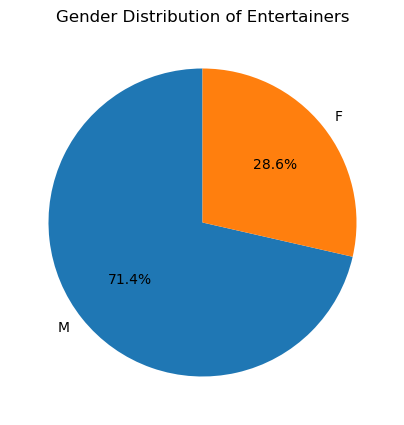

In [45]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Power BI passes the data to the 'dataset' variable


# Gender distribution pie chart
gender_count = df_merged['Gender (traditional)'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(5,5))
gender_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Entertainers')
plt.ylabel('')  # Hide the y-label for cleaner visualization
plt.show()


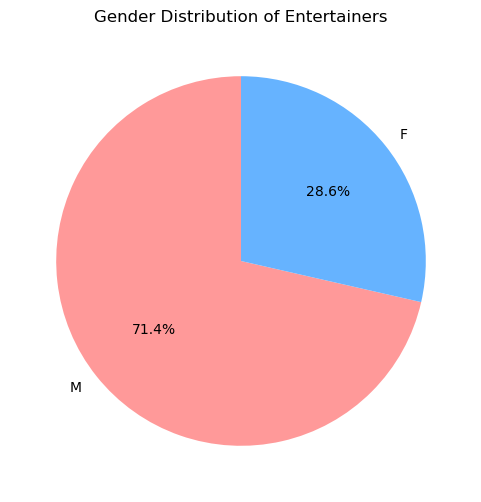

In [49]:
#Gender Distribution (Pie Chart)

import matplotlib.pyplot as plt

# Example data for gender distribution
gender_count = df_merged['Gender (traditional)'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution of Entertainers')
plt.show()


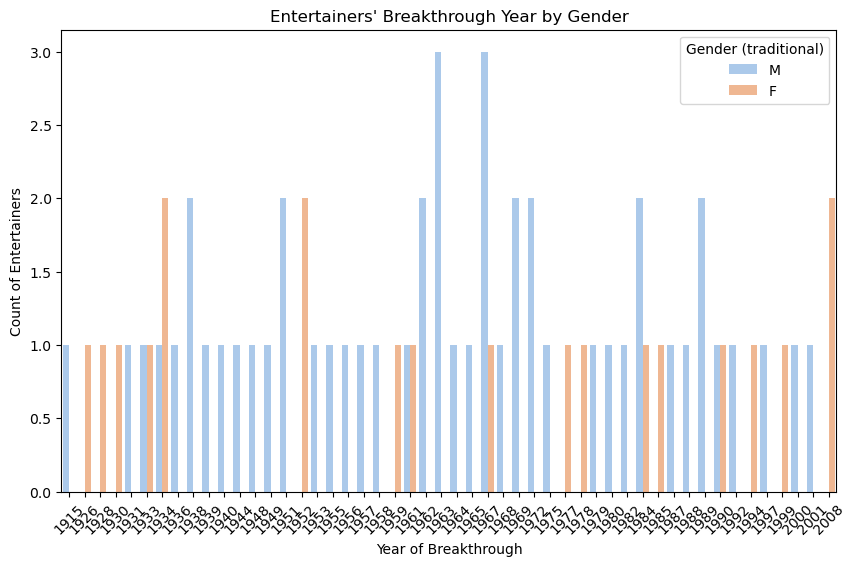

In [53]:

#Breakthrough Year by Gender (Bar Plot)
import seaborn as sns

# Set figure size
plt.figure(figsize=(10,6))

# Bar plot for breakthrough year by gender
sns.countplot(x='Year of Breakthrough/#1 Hit/Award Nomination', hue='Gender (traditional)', data=df_merged, palette='pastel')

# Adding titles and labels
plt.title('Entertainers\' Breakthrough Year by Gender')
plt.xlabel('Year of Breakthrough')
plt.ylabel('Count of Entertainers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


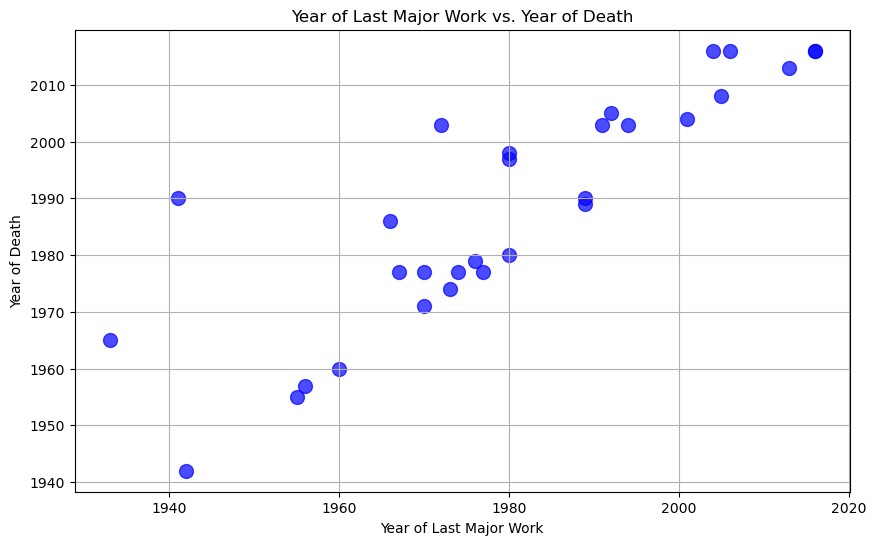

In [63]:
#Year of Last Major Work vs. Year of Death (Scatter Plot)
#Scatter plot for Year of Last Major Work vs. Year of Death
plt.figure(figsize=(10,6))
plt.scatter(df_merged['Year of Last Major Work (arguable)'], df_merged['Year of Death'], c='blue', s=100, alpha=0.7)

# Adding titles and labels
plt.title('Year of Last Major Work vs. Year of Death')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Year of Death')
plt.grid(True)
plt.show() 

C:\Users\APPLE\AppData\Local\Temp\ipykernel_14716\2671325188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entertainer', y='Year of First Oscar/Grammy/Emmy', data=df_merged, palette='viridis')


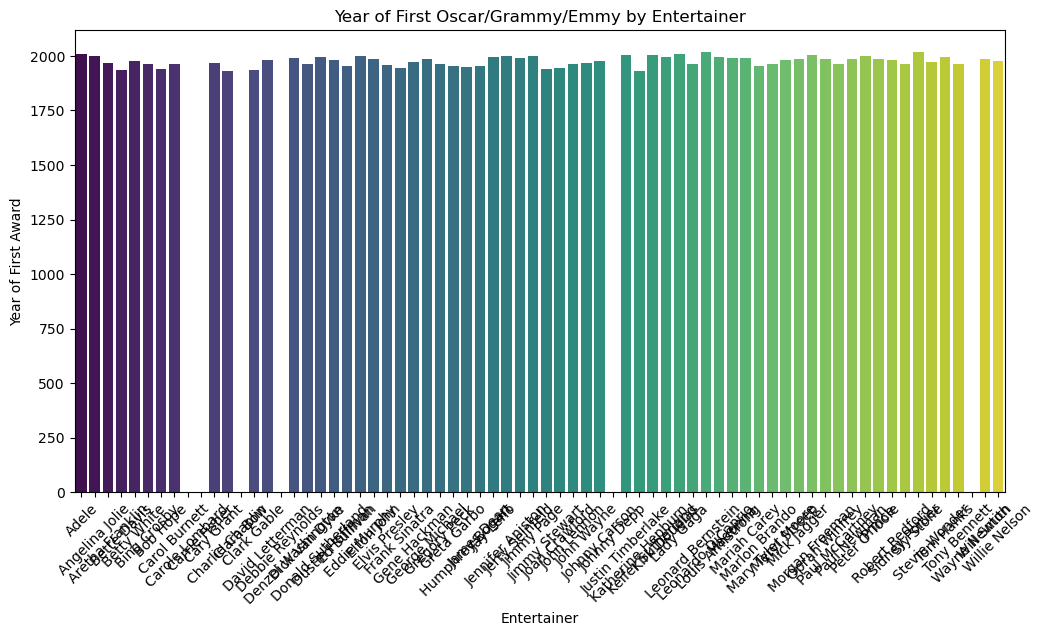

In [65]:
#  Year of First Award (Column Plot)
plt.figure(figsize=(12,6))
sns.barplot(x='Entertainer', y='Year of First Oscar/Grammy/Emmy', data=df_merged, palette='viridis')

# Adding titles and labels
plt.title('Year of First Oscar/Grammy/Emmy by Entertainer')
plt.xlabel('Entertainer')
plt.ylabel('Year of First Award')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

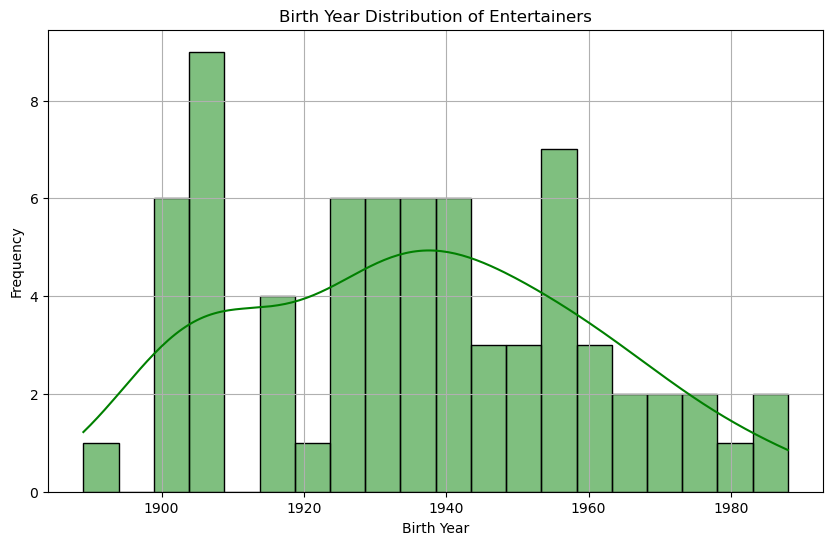

In [69]:
#Birth Year Distribution (Histogram)
# Histogram for Birth Year Distribution
plt.figure(figsize=(10,6))
sns.histplot(df_merged['Birth Year'], bins=20, kde=True, color='green')

# Adding titles and labels
plt.title('Birth Year Distribution of Entertainers')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [73]:
df_merged.to_csv('Entertainer_data.csv',index=False)